# Word2Vec



**Motivazione**
Come possiamo convertire le "parole" in dati numerici in modo che possano essere date in input ad un modello? 

La risposta più semplice che ci viene in mente potrebbe essere la codifica one-hot (anche detta dummy variable encoding o 1-of-V encoding).

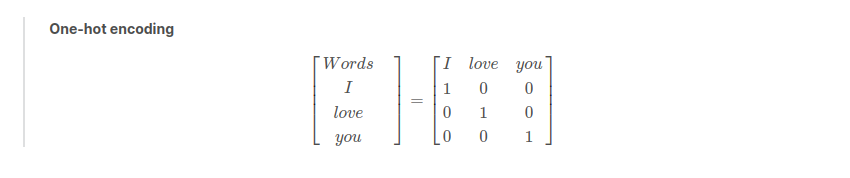

Questa soluzione presenta due svantaggi principali:



*   **Curse of dimensionality:** troppo costosa dal punto di vista computazionale con un corpus di grandi dimensioni. 
*   **Nessuna info contestuale e semantica ** (embedded nei vettori one-hot) non è facilmente utilizzabile per compiti come il POS tagging, il riconoscimento di nomi di entità, ecc.


Word2Vec tende a risolvere questi problemi incorporando le parole in uno spazio vettoriale n-dimensionale (la scelta di n è discrezionale) e minimizzando la somiglianza del coseno tra parole simili.

## Idea

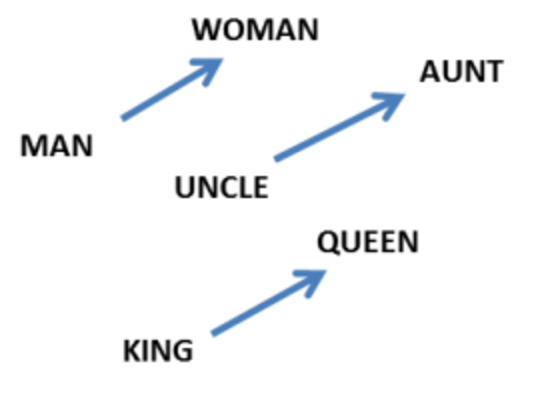

**Goal**

Minimizzare la somiglianza del coseno tra parole simili.

**IDEA**

Potremmo incorporare le parole in uno spazio vettoriale??

Quindi..."associare a ogni parola del vocabolario in un distributed word feature vector". 

Idealmente, questo vettore di caratteristiche rappresenta diversi aspetti della parola, in modo che le parole "simili" (ad esempio, cani e gatti) siano vicine (simili al coseno) tra loro.




*Distributed representation for words is proposed in* [(Bengio et al.)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)





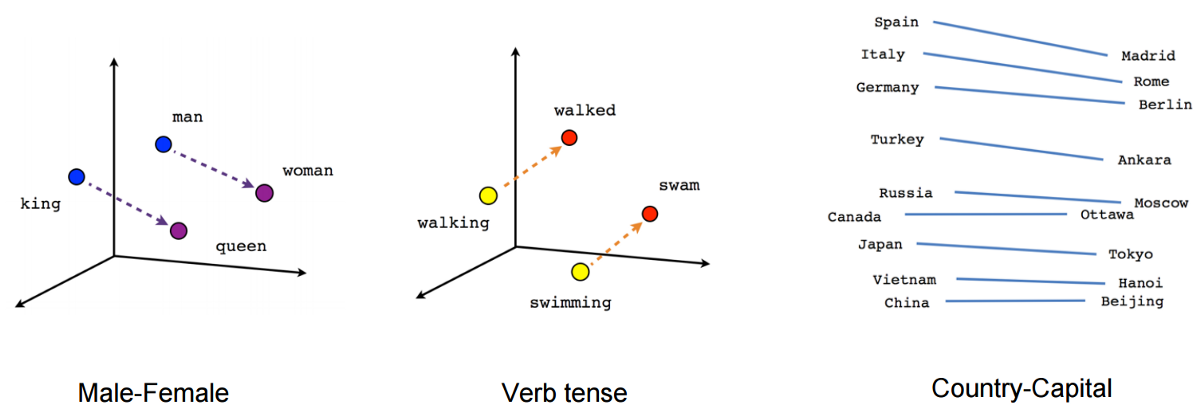

La trasformazione V -> m può essere eseguita moltiplicando a destra (supponendo che ogni parola sia codificata come vettore di righe) una matrice di dimensioni V$\times$m.


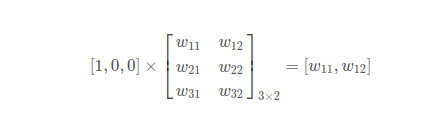

$[w_{11},w_{12}]$ è il vettore delle caratteristiche della parola distribuita di $[1,0,0]$ (la parola "I"), e la matrice dei pesi (proiezione) è la map necessaria per convertire ogni parola nel suo vettore di caratteristiche (feature vector).

Per ottenere rappresentazioni simili per parole simili, dobbiamo regolare i pesi in base a una **funzione obiettivo**.



Il calcolo di questa funzione è simile all'architettura di una rete neurale - con $V$ neuroni nello strato di ingresso, $D$ neuroni nello strato nascosto.



La risultante è la matrice $V \times D$ che indica la matrice dei pesi tra lo strato di ingresso e lo strato nascosto. (lo strato di uscita vedi prox punto).

Come formulare l'obiettivo (objective function) di questa rete neurale (NN) e quale dovrebbe essere la forma dell'ultimo strato?


La risposta è prevedibile: se vogliamo che il vettore di caratteristiche rappresenti le caratteristiche semantiche delle parole, dobbiamo impostare la funzione obiettivo di questa NN come un semplice task in NLP. 
In questo modo, vettori di caratteristiche simili daranno significati (previsioni) simili in linguaggio naturale.

**Esempio**, possiamo costruire una rete neurale per prevedere la parola successiva date $N$ parole precedenti. 

La dimensione dell'input sarà $N \times V$ (stack di $N$ vettori riga).

Poiché abbiamo bisogno di una sola matrice dei pesi, la dimensione della matrice dei pesi è ancora $N \times D$. Poi ci sarà un hidden layer di $N \times D$. 

La dimensione dello strato di uscita dovrà essere $1 \times V$ (ossia una parola).

# Word2Vec

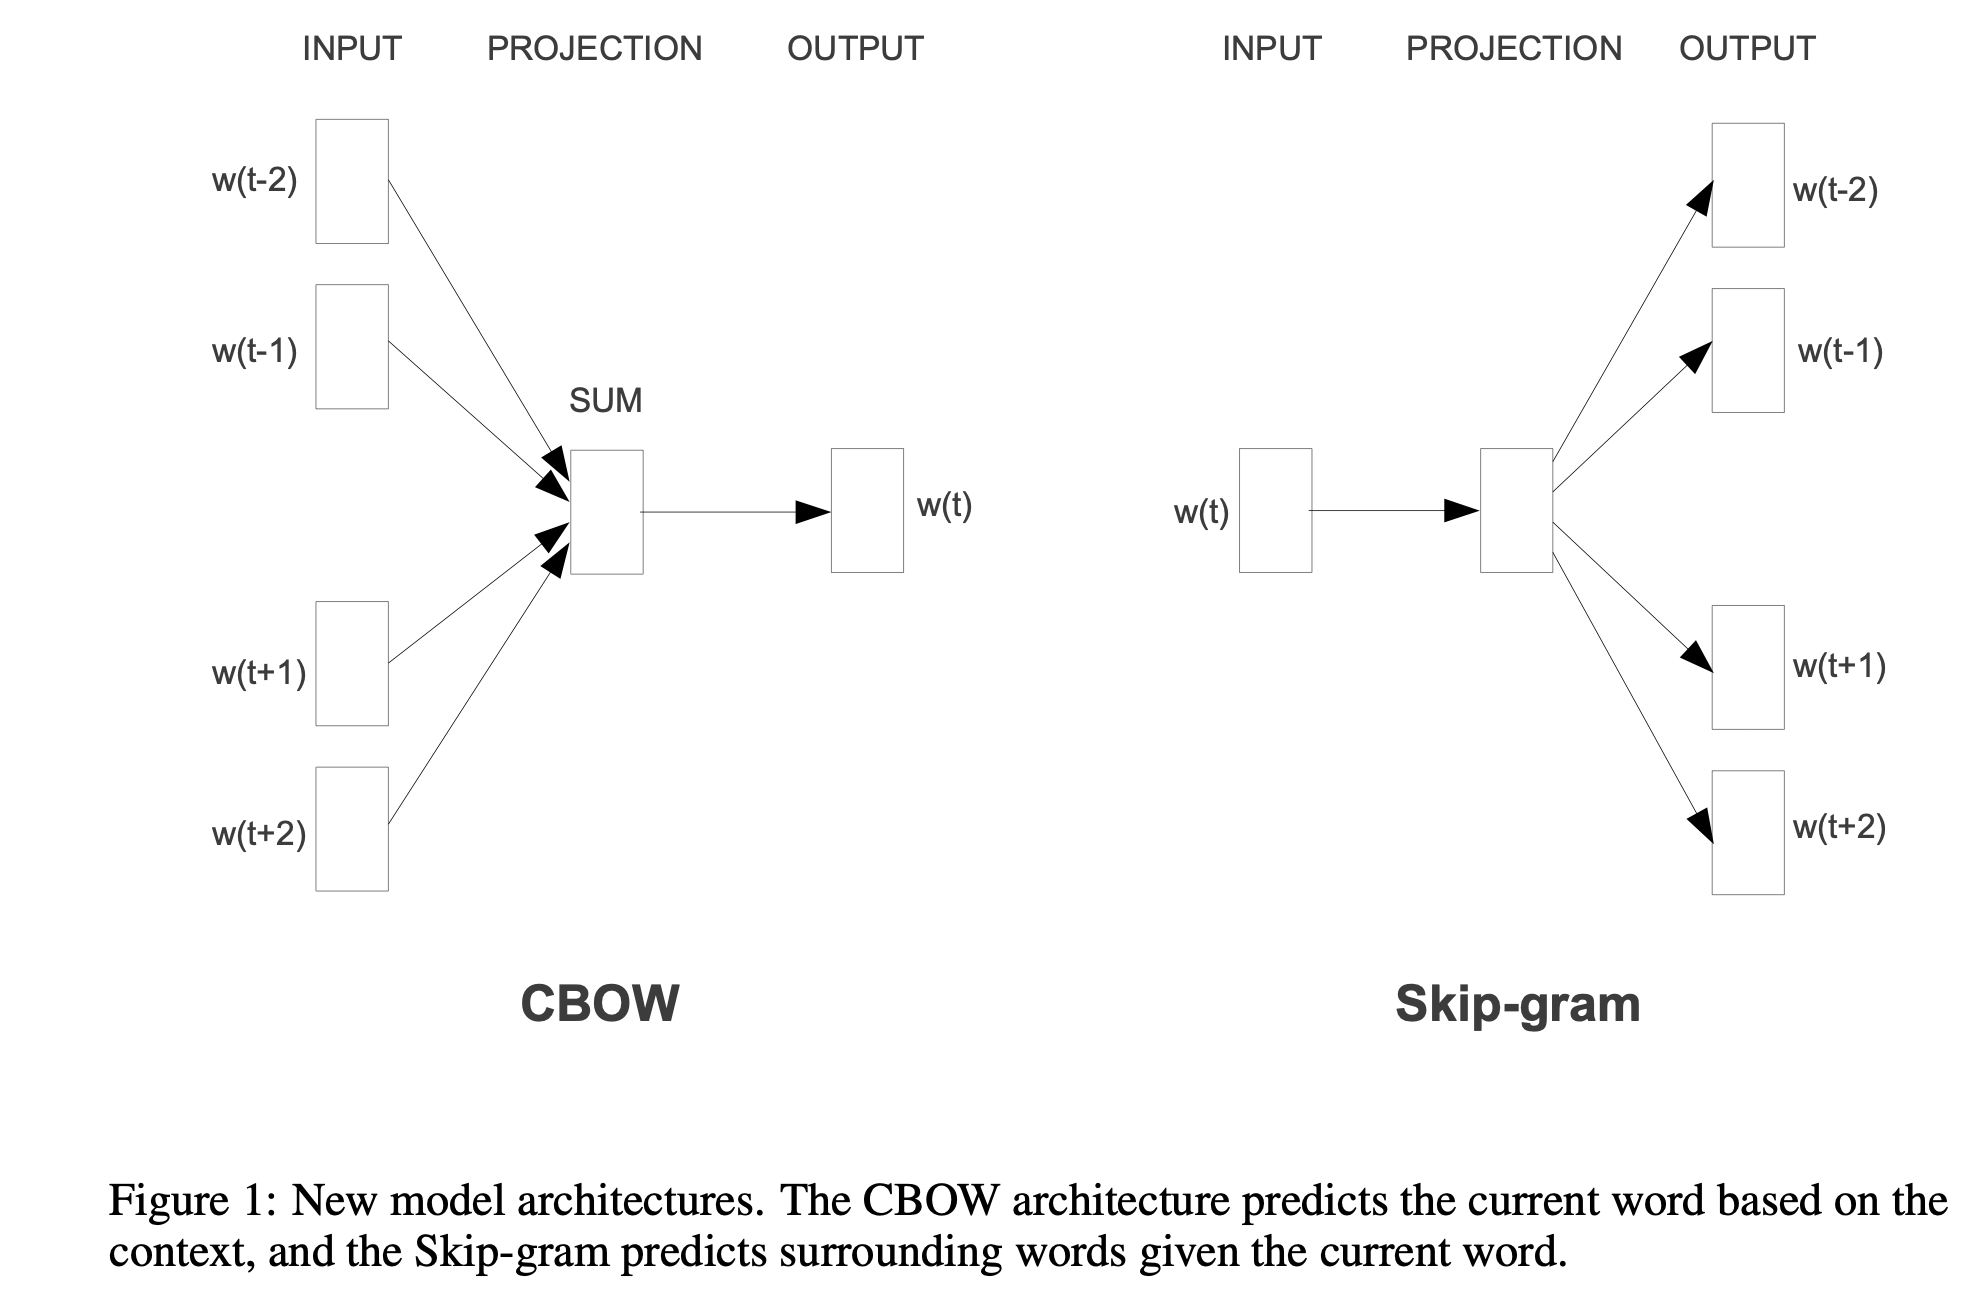

**Continuous Bag-of-Words Model (CBOW)** Il primo modello proposto è simile ad una Rete Neurale feedforward, con l'eliminazione dello strato nascosto non lineare.
L'obiettivo consiste nell'utilizzare le parole circostanti di una finestra di dimensione $N$ come input per predire la parola centrale.

*Per ridurre ulteriormente la complessità computazionale, i vettori delle caratteristiche delle $N$ parole vengono mediati nello strato di proiezione, in modo che il loro "ordine" non abbia più importanza. Questa mancanza di ordine conferisce a questa architettura il nome di Bag-of-Words.*


**Continuous Skip-gram Model (Skip-gram)** La seconda architettura è l'inverso del CBOW, ma invece di prevedere la parola corrente in base al contesto, cerca di prevedere tutte le altre parole in base alla parola centrale. Più precisamente, lo skip-gram utilizza ogni parola corrente come input per un log-linear classifier con uno strato di proiezione continua, e predice le parole entro un certo intervallo prima e dopo la parola corrente.



---



In [ ]:
import os
import numpy as np
import pandas as pd
from time import time
from joblib import cpu_count
from collections import Counter
from gensim.models import Word2Vec
from sklearn.datasets import fetch_20newsgroups

In [ ]:
# dataset esempio fornito da sklearn.datasets
newsgroups_train = fetch_20newsgroups(subset='test')

# USIAMO una versione di Word2vec fornita da Gensim
# libreria si aspetta come input una sequenza di frasi,
# ogni frase è un elenco di parole 
# Per non facciamo alcuna pulizia
sentences = [doc.strip().split() for doc in newsgroups_train.data]

# esempio
print('raw data:\n\n', newsgroups_train.data[0])
print('example input:\n', sentences[0])

raw data:

 From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler

example input:
 ['From:', 'v064mb9k@ubvmsd.cc.buffalo.edu', '(NEIL', 'B.', 'GANDLER)', 'Subject:', 'Need', 'info', 'on', '88-89', 'Bonneville', 'Organization:', 'University', 'at', 'Buffalo', 'Lines:', '10', 'News-Software:', 'VAX/VMS', 'VNEWS', '1.41', 'Nntp-Posting-Host:', 'ubvmsd.cc.buffa

In [ ]:
# a parte la frase in input diciamo al modello che dovrà usare la cpu per nostra comodità
workers = cpu_count()

start = time()
word2vec = Word2Vec(sentences, workers=workers)
elapse = time() - start
print('elapse time:', elapse)


# osserviamo i learned word vectors con (.wv.vectors)
# e il vocabolario/parola che corrisponde a ogni word vector
word_vectors = pd.DataFrame(word2vec.wv.vectors, index=word2vec.wv.index2word)
print('word vector dimension: ', word_vectors.shape)
word_vectors.head()

elapse time: 25.169799089431763
word vector dimension:  (32584, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
the,-0.365110,1.903777,0.187416,-0.176492,1.156827,-2.154834,-0.219985,-0.250884,-0.216239,-0.455333,...,-0.490352,-0.366025,0.047971,1.563098,0.091224,-0.078257,-1.059133,0.417573,-0.336750,-0.936665
to,-1.132578,1.440557,1.163202,1.571705,-0.314822,-0.217370,-1.693163,0.846524,0.648316,0.648496,...,-0.662880,-0.091456,-0.572082,-0.936510,-1.207929,2.506699,-1.499711,-1.181963,0.322788,-1.010621
of,0.488589,-1.015557,2.311230,-1.349093,-1.336918,-0.455582,-1.705287,0.925943,-1.586726,1.161409,...,0.671765,0.802061,2.067647,1.583439,-2.042262,0.210593,0.885400,-0.238809,-0.454195,-2.849072
a,-0.129840,3.020795,2.485309,-0.649923,1.213811,-2.594059,1.609158,0.239266,2.260765,-0.493287,...,0.094444,1.706704,-0.084264,-2.094908,-1.108613,0.377787,1.458903,1.227897,-0.318604,-0.979550
and,-1.455827,0.830368,-0.823803,-0.020897,-0.407604,-1.079769,0.617173,-0.454655,-1.401686,-0.985127,...,-0.472610,0.740341,1.089929,1.092584,-0.349264,1.409818,0.987904,-0.663425,-0.324451,-0.954136


Dopo che il modello ha appreso il word vector per ogni parola valida del nostro corpus, possiamo usarlo per cercare parole e frasi correlate **(parole che hanno un significato semantico simile)** per un dato termine di interesse, confrontando le distanze tra i vettori con una metrica di distanza come la *cossim*.

In [ ]:
word2vec.wv.most_similar(positive=['network'], topn=6)

[('utility', 0.9139296412467957),
 ('library', 0.9002372622489929),
 ('resources', 0.8988312482833862),
 ('port', 0.8967370390892029),
 ('display', 0.8952208161354065),
 ('package', 0.8935558795928955)]

Oltre a trovare parole simili utilizzando metriche di distanza i words embeddings hanno la notevole proprietà che le analogie tra le parole sembrano essere codificate nella differenza tra i vettori di parole. 

# Dettagli

Addestramento Rete Neurale: Data una parola specifica nel mezzo di una frase, vengono guardate le parole vicine e ne sceglie una a caso.

L'algoritmo prevede un iperparametro di dimensione della finestra che quantifica la parola "vicina". 

Una tipica dimensione della finestra potrebbe essere 5, ovvero 5 parole dietro e 5 parole avanti (10 in totale). 

Esistono alcune implementazioni che fanno qualcosa di ancora più "particolare": Invece di utilizzare una finestra fissa $k$ intorno a ogni parola, la finestra è distribuita uniformemente tra $1,2,...,K$ , dove $K$ è la dimensione massima della finestra specificata.

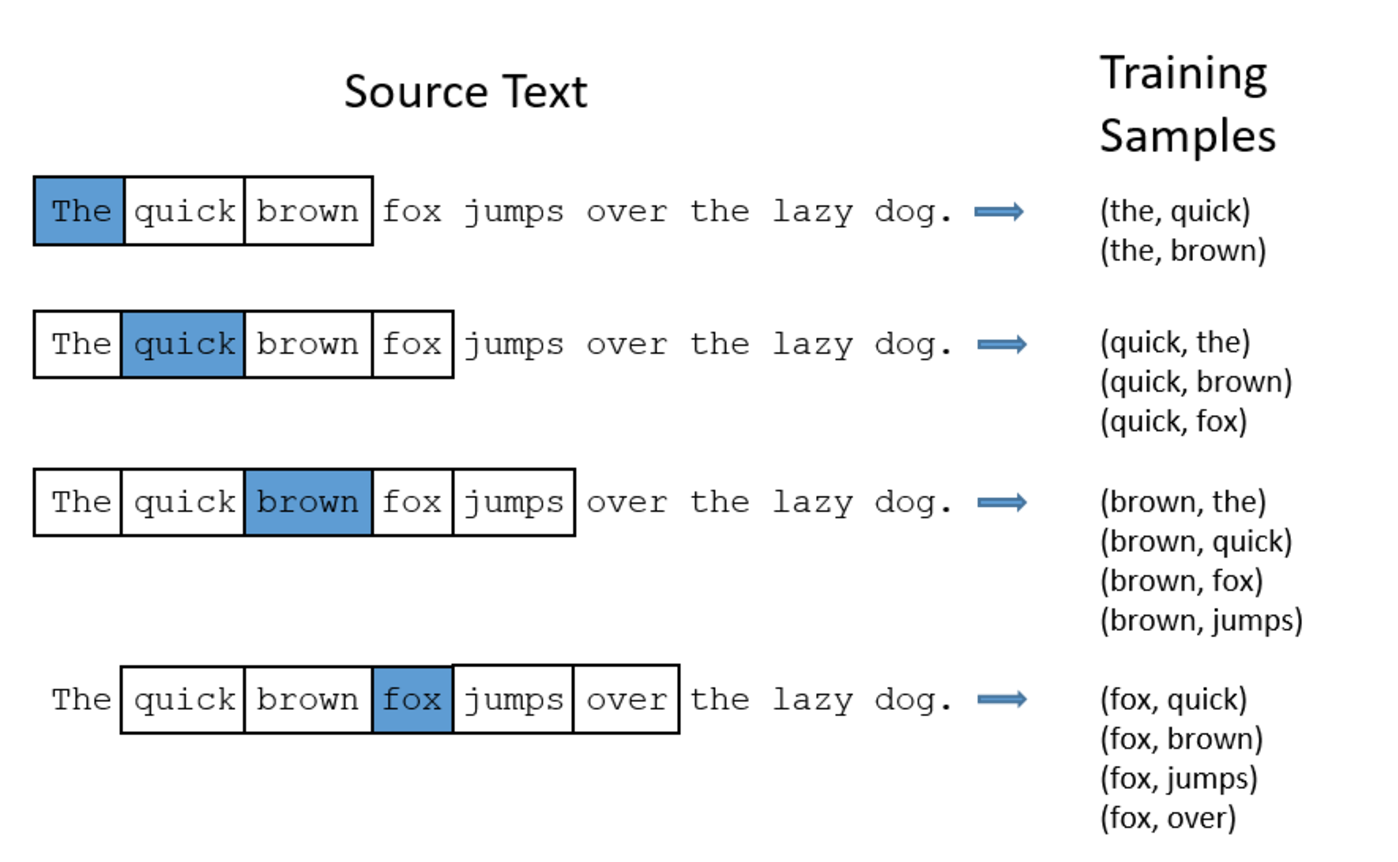

Dopo aver fornito alla rete un certo numero di coppie di parole, la rete ci dirà la probabilità che ogni parola del nostro vocabolario sia "vicina" alla parola che abbiamo scelto. 

Le probabilità di uscita si riferiscono alla probabilità di trovare ogni parola del vocabolario nelle vicinanze della parola in ingresso. 

**Per esempio**, se abbiamo dato alla rete addestrata la parola di input "Maglione", le probabilità di uscita dovrebbero essere molto più alte per parole come "Pantaloni" e "Maglietta" che per parole non correlate come "anguria" e "canguro".

Come viene rappresentato tutto questo? 


Prima di tutto, sappiamo che non possiamo dare in pasto a una rete neurale (o probabilmente a qualsiasi modello di apprendimento automatico) una parola solo come stringa di testo, cioè abbiamo bisogno di un modo per rappresentare le parole alla rete. 
*   Per farlo, dobbiamo prima costruire un vocabolario di parole a partire dai nostri documenti di addestramento. Assumiamo che il nostro corpus abbia un vocabolario di 10.000 parole.

*   Rappresenteremo una parola di input $w_i$ come un vettore a un punto. 

*   Questo vettore avrà 10.000 componenti (una per ogni parola unica del nostro vocabolario) e metteremo un "1" nella posizione corrispondente alla parola $w_i$ e degli 0 in tutte le altre posizioni. 

*   L'output della rete è un singolo vettore (anch'esso con 10.000 componenti) contenente, per ogni parola del nostro vocabolario, la probabilità che una parola vicina scelta a caso sia quella parola del vocabolario. 

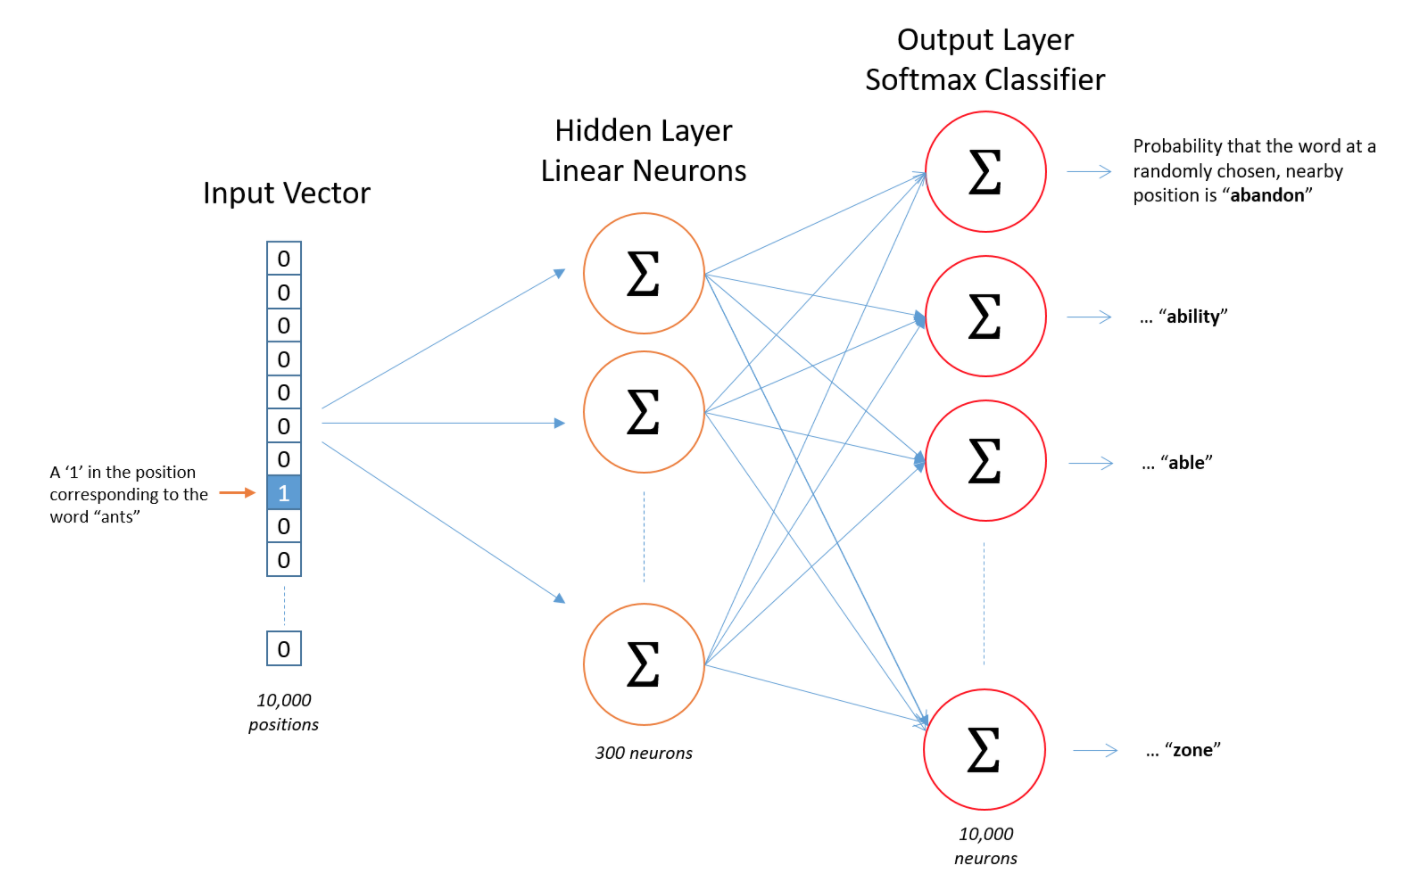

Non c'è alcuna funzione di attivazione sui neuroni dello strato nascosto, ma i neuroni di uscita utilizzano softmax. 

Quando si **addestra** questa rete su coppie di parole, l'**ingresso** è un one-hot vector che rappresenta la parola in ingresso e anche l'uscita dell'addestramento è un one-hot vector che rappresenta la parola in uscita.

 
Ma quando **valutiamo** la rete addestrata su una parola in ingresso, il vettore di **uscita** sarà in realtà una *distribuzione di probabilità*.

Un diagramma alternativo che illustra bene l'architettura del modello Skip-gram:

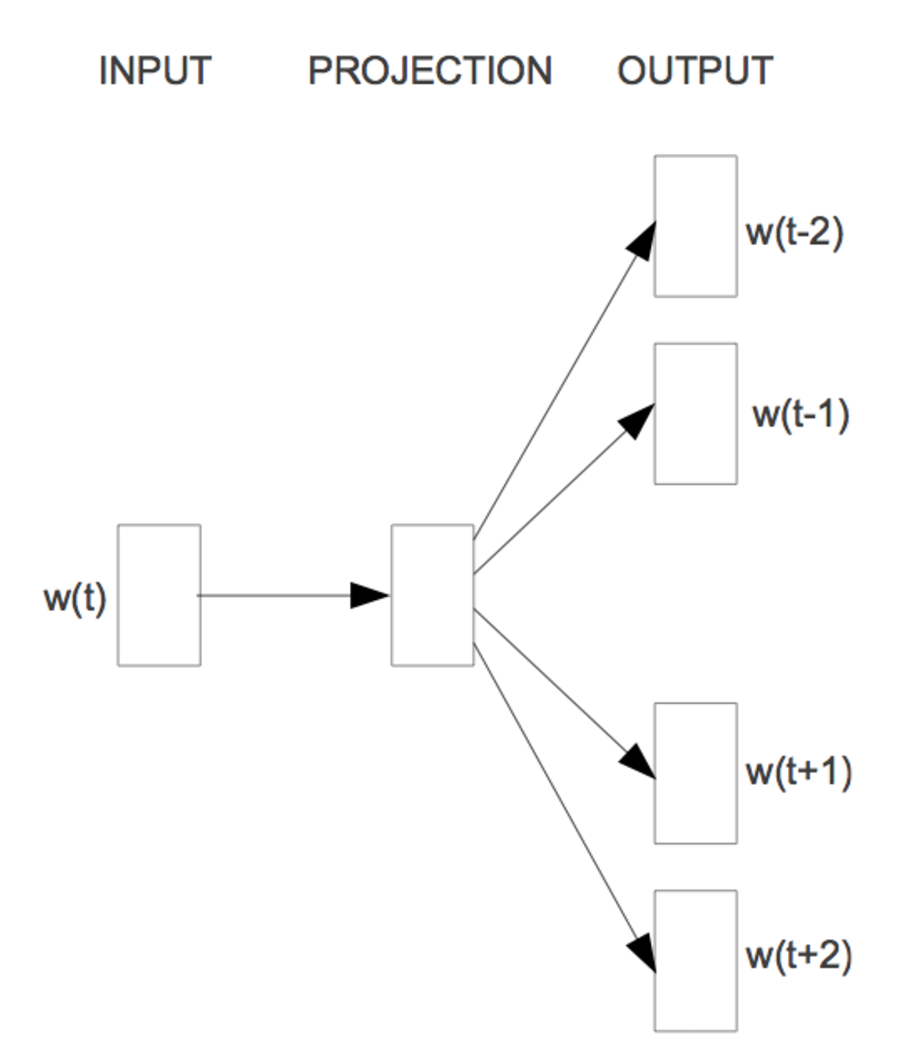

Dove si utilizza la parola centrale $w_{(t)}$ per prevedere le parole circostanti

Il **GOAL** dell'addestramento è quello di apprendere rappresentazioni di vettori di parole, ovvero proiezioni che siano in grado di prevedere le parole vicine.

**The Hidden Layer**

Supponiamo di voler apprendere vettori di parole con $300$ features. 

Il numero di features è un iperparametro che dovremo regolare in base alla nostra applicazione per vedere quale produce il risultato migliore. 

Quindi lo strato nascosto sarà rappresentato da una matrice di pesi con $10.000$ righe (una per ogni parola del nostro vocabolario) e $300$ colonne (una per ogni neurone nascosto).

Ora, se osserviamo cosa succede quando moltiplichiamo la rappresentazione $1 × 10.000$ del one-hot-vector della parola con una matrice $10.000 \times 300$ che rappresenta il peso dello strato nascosto, in effetti selezionerà solo la riga della matrice corrispondente all'"1". 

La figura seguente è un piccolo esempio che esegue una moltiplicazione matriciale di un one-hot-vector $1 \times 5$ con il peso di uno strato nascosto $5 x 3$.

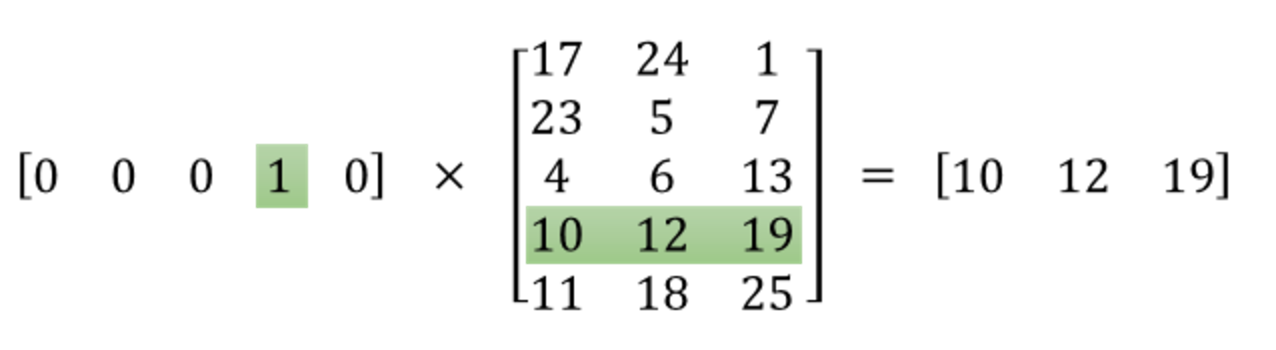

**The Output Layer**

Il vettore di parole $1 \times 300$ per $w_i$ viene quindi inviato allo strato di uscita. 

Lo strato di uscita è un classificatore di regressione Softmax....

*l'idea del regressore è che ogni neurone di uscita, uno per ogni parola del nostro vocabolario, produrrà una probabilità di uscita compresa tra 0 e 1 e la somma di tutti questi valori di uscita sarà pari a 1*.


In particolare, ogni neurone di uscita ha un vettore di pesi che moltiplica per il vettore di parole dello strato nascosto.


Infine, per ottenere la somma delle uscite a 1, si divide il risultato per la somma dei risultati di tutti i $10.000$ neuroni di uscita. 

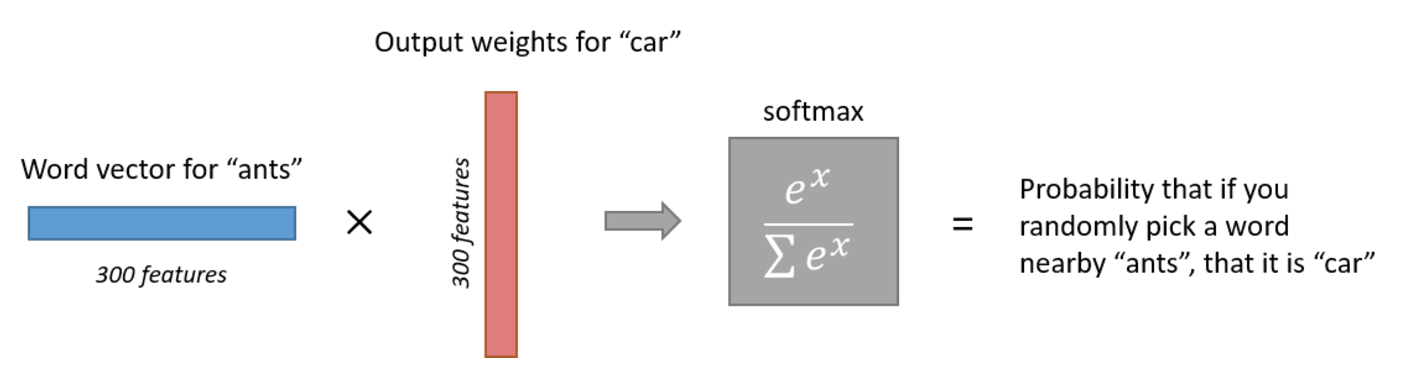

Si noti che la rete neurale non sa nulla dell'offset della parola in uscita rispetto alla parola in ingresso. 

In altre parole, non apprende un diverso insieme di probabilità per la parola prima dell'input rispetto a quella dopo.

Ricordiamo che all'inizio della documentazione abbiamo detto che l'obiettivo di word2vec è quello di rappresentare ogni parola del corpus come rappresentazione vettoriale, cercando di preservare il significato semantico. 

Ciò significa che se due parole diverse hanno "contesti" molto simili (cioè quali parole è probabile che compaiano intorno a loro), il nostro modello deve produrre risultati molto simili per queste due parole. Un modo per far sì che la rete produca previsioni di contesti simili per queste due parole è che i vettori delle parole siano simili. 

Quindi, per rendere l'idea, se due parole hanno contesti simili, allora word2vec è motivato ad apprendere vettori di parole simili per queste due parole!

In [ ]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

# Download the "glove-twitter-25" embeddings
glove_vectors = gensim.downloader.load('glove-twitter-25')

# Use the downloaded vectors as usual:
glove_vectors.most_similar('twitter')

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']
[==================================================] 100.0% 104.8/104.8MB downloaded


[('facebook', 0.9480051398277283),
 ('tweet', 0.9403422474861145),
 ('fb', 0.9342358708381653),
 ('instagram', 0.9104823470115662),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885936141014099),
 ('tweets', 0.8878157734870911),
 ('tl', 0.8778461813926697),
 ('link', 0.877821147441864),
 ('internet', 0.8753897547721863)]

In [ ]:
vector = glove_vectors.wv['computer']  # get numpy vector of a word

<ipython-input-7-884b7d3835d4>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vector = glove_vectors.wv['computer']  # get numpy vector of a word


In [ ]:
glove_vectors.wv.most_similar(positive=['woman','nurse'], negative=['man'], topn=5)

<ipython-input-13-891efb840cd2>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  glove_vectors.wv.most_similar(positive=['woman','nurse'], negative=['man'], topn=5)


[('receptionist', 0.8595498204231262),
 ('therapist', 0.8330935835838318),
 ('worker', 0.8265690803527832),
 ('physician', 0.822212278842926),
 ('contractor', 0.8193777799606323)]

In [ ]:
glove_vectors.wv.most_similar(positive=['woman','businesswoman'], negative=['man'], topn=5)

<ipython-input-24-afdf2c9ed1fa>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  glove_vectors.wv.most_similar(positive=['woman','businesswoman'], negative=['man'], topn=5)


[('daughter-in-law', 0.8543343544006348),
 ('reclusive', 0.8537870645523071),
 ('curvaceous', 0.849918782711029),
 ('serviceman', 0.8482001423835754),
 ('redditor', 0.843968391418457)]

In [ ]:
wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-50')

wiki_vectors.most_similar('twitter')

[==================================================] 100.0% 66.0/66.0MB downloaded


[('facebook', 0.9333045482635498),
 ('myspace', 0.8801369667053223),
 ('youtube', 0.8430657982826233),
 ('blog', 0.8262056708335876),
 ('blogs', 0.8064823746681213),
 ('blogging', 0.7970671653747559),
 ('tumblr', 0.7901090383529663),
 ('email', 0.778261125087738),
 ('tweets', 0.7604536414146423),
 ('e-mail', 0.7538727521896362)]

In [ ]:
vector = wiki_vectors.wv['computer']  # get numpy vector of a word

<ipython-input-16-0411a471b264>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vector = wiki_vectors.wv['computer']  # get numpy vector of a word


In [ ]:
wiki_vectors.wv.most_similar(positive=['woman','businesswoman'], negative=['man'], topn=5)

<ipython-input-23-4945dffd02f4>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  wiki_vectors.wv.most_similar(positive=['woman','businesswoman'], negative=['man'], topn=5)


[('socialite', 0.7628152966499329),
 ('homemaker', 0.7528749108314514),
 ('schoolteacher', 0.7223620414733887),
 ('housewife', 0.7159836292266846),
 ('divorcée', 0.647883415222168)]